In [1]:
!pip install torch

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
 
training_df = pd.read_csv('Data/training_data_clean.csv')
training_df = training_df.sample(80000)
training_df.head()



,sentiment,tweet
85916,0,i miss tony tell him i say hi
414719,0,wants a mac pro
18404,0,is disillusioned in everything she once believed
475575,0,ayeee just now i am well excited but we are bo...
1176348,4,watchinq qreace i ♥ this movie


In [72]:
# positive reviews are labeled as 4, change that to 1

training_df['sentiment'] = training_df['sentiment'].apply(lambda x: 1 if x == 4 else 0)

In [73]:
training_df = training_df.dropna()

In [74]:
list_of_tweets = training_df['tweet'].tolist()

In [75]:
from collections import Counter

all_text = ' '.join(list_of_tweets)
words = all_text.split()

count_words = Counter(words)
total_words = len(words)
sorted_words = count_words.most_common(total_words)
sorted_words

[('i', 49318),
 ('to', 31176),
 ('the', 25871),
 ('is', 19484),
 ('a', 18986),
 ('you', 17819),
 ('not', 17009),
 ('my', 15732),
 ('it', 15037),
 ('and', 14899),
 ('am', 11619),
 ('for', 10963),
 ('in', 10528),
 ('of', 9724),
 ('have', 9369),
 ('that', 8672),
 ('on', 8342),
 ('me', 8003),
 ('so', 7627),
 ('do', 6651),
 ('but', 6437),
 ('just', 6259),
 ('are', 5762),
 ('with', 5755),
 ('at', 5605),
 ('was', 5593),
 ('can', 5499),
 ('be', 5495),
 ('will', 5301),
 ('this', 4747),
 ('now', 4572),
 ('up', 4547),
 ('good', 4521),
 ('going', 4456),
 ('all', 4198),
 ('day', 4134),
 ('out', 4061),
 ('get', 4017),
 ('like', 3830),
 ('go', 3688),
 ('no', 3676),
 ('got', 3529),
 ('too', 3334),
 ('your', 3266),
 ('love', 3253),
 ('today', 3225),
 ('we', 3161),
 ('work', 3159),
 ('what', 3067),
 ('want', 2943),
 ('from', 2926),
 ('lol', 2884),
 ('time', 2844),
 ('back', 2781),
 ('one', 2601),
 ('did', 2590),
 ('about', 2529),
 ('know', 2517),
 ('really', 2492),
 ('had', 2410),
 ('see', 2357),
 ('the

In [76]:
vocab_to_int = {w:i+1 for i, (w,c) in enumerate(sorted_words)}
vocab_to_int

{'i': 1,
 'to': 2,
 'the': 3,
 'is': 4,
 'a': 5,
 'you': 6,
 'not': 7,
 'my': 8,
 'it': 9,
 'and': 10,
 'am': 11,
 'for': 12,
 'in': 13,
 'of': 14,
 'have': 15,
 'that': 16,
 'on': 17,
 'me': 18,
 'so': 19,
 'do': 20,
 'but': 21,
 'just': 22,
 'are': 23,
 'with': 24,
 'at': 25,
 'was': 26,
 'can': 27,
 'be': 28,
 'will': 29,
 'this': 30,
 'now': 31,
 'up': 32,
 'good': 33,
 'going': 34,
 'all': 35,
 'day': 36,
 'out': 37,
 'get': 38,
 'like': 39,
 'go': 40,
 'no': 41,
 'got': 42,
 'too': 43,
 'your': 44,
 'love': 45,
 'today': 46,
 'we': 47,
 'work': 48,
 'what': 49,
 'want': 50,
 'from': 51,
 'lol': 52,
 'time': 53,
 'back': 54,
 'one': 55,
 'did': 56,
 'about': 57,
 'know': 58,
 'really': 59,
 'had': 60,
 'see': 61,
 'there': 62,
 'some': 63,
 'its': 64,
 'if': 65,
 'still': 66,
 'would': 67,
 'how': 68,
 'they': 69,
 'new': 70,
 'night': 71,
 'think': 72,
 'amp': 73,
 'thanks': 74,
 'well': 75,
 'as': 76,
 'when': 77,
 'home': 78,
 'he': 79,
 'more': 80,
 '2': 81,
 'need': 82,
 'mis

In [77]:
tweets_int = []
for tweet in list_of_tweets:
    r = [vocab_to_int[w] for w in tweet.split()]
    tweets_int.append(r)
tweets_int[0]

[1, 83, 2581, 257, 138, 1, 163, 266]

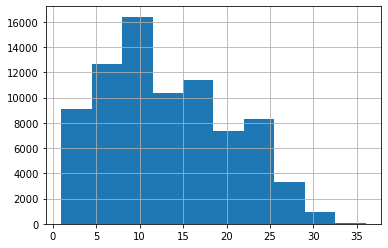

count    79836.000000
mean        13.021431
std          7.169691
min          1.000000
25%          7.000000
50%         12.000000
75%         18.000000
max         36.000000
dtype: float64

In [78]:
# show length of tweets (helps decide sequence length for lstm)

tweet_len = [len(x) for x in tweets_int]
pd.Series(tweet_len).hist()
plt.show()
pd.Series(tweet_len).describe()

In [56]:
import numpy as np

seq_length = 20

# Return features of tweet ints, where each tweet is padded with 0's or truncated to the input seq_length.
def pad_features(tweets_int, seq_length):
    
    features = np.zeros((len(tweets_int), seq_length), dtype = int)
    
    for i, tweet in enumerate(tweets_int):
        tweet_len = len(tweet)
        
        if tweet_len <= seq_length:
            zeroes = list(np.zeros(seq_length-tweet_len))
            new = zeroes+tweet
        elif tweet_len > seq_length:
            new = tweet[0:seq_length]
        
        features[i,:] = np.array(new)
    
    return features

features = pad_features(tweets_int, seq_length)
features

array([[   0,    0,    1, ...,    1,   29,  647],
       [   0,  121,    3, ...,    7, 5283,    7],
       [   0,    0,    0, ...,   44,   26,   33],
       ...,
       [   0,    0,    0, ...,   37,    5, 1864],
       [   0,    0,    0, ..., 4447, 1009,  391],
       [  35,    2,  178, ...,   38,    1,   11]])

In [57]:
# Split data into 80% training, 10% testing, 10% validation

y_labels = training_df['sentiment'].tolist()
len_feat = len(features)

split_frac = 0.8

train_x = np.array(features[0:int(split_frac*len_feat)])
train_y = np.array(y_labels[0:int(split_frac*len_feat)])

remaining_x = np.array(features[int(split_frac*len_feat):])
remaining_y = np.array(y_labels[int(split_frac*len_feat):])

valid_x = np.array(remaining_x[0:int(len(remaining_x)*0.5)])
valid_y = np.array(remaining_y[0:int(len(remaining_y)*0.5)])

test_x = np.array(remaining_x[int(len(remaining_x)*0.5):])
test_y = np.array(remaining_y[int(len(remaining_y)*0.5):])

In [58]:
import torch
from torch.utils.data import DataLoader, TensorDataset

# create Tensor datasets
train_data = TensorDataset(torch.from_numpy(train_x), torch.from_numpy(train_y))
valid_data = TensorDataset(torch.from_numpy(valid_x), torch.from_numpy(valid_y))
test_data = TensorDataset(torch.from_numpy(test_x), torch.from_numpy(test_y))

# dataloaders
batch_size = 50

# shuffle data
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size, drop_last=True)
valid_loader = DataLoader(valid_data, shuffle=True, batch_size=batch_size, drop_last=True)
test_loader = DataLoader(test_data, shuffle=True, batch_size=batch_size, drop_last=True)

In [59]:
import torch.nn as nn

class SentimentLSTM(nn.Module):
    """
    The RNN model that will be used to perform Sentiment analysis.
    """

    def __init__(self, vocab_size, output_size, embedding_dim, hidden_dim, n_layers, drop_prob=0.5):
        """
        Initialize the model by setting up the layers.
        """
        super().__init__()

        self.output_size = output_size
        self.n_layers = n_layers
        self.hidden_dim = hidden_dim
        
        # embedding and LSTM layers
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, n_layers, 
                            dropout=drop_prob, batch_first=True)
        
        # dropout layer
        self.dropout = nn.Dropout(0.3)
        
        # linear and sigmoid layers
        self.fc = nn.Linear(hidden_dim, output_size)
        self.sig = nn.Sigmoid()
        

    def forward(self, x, hidden):
        """
        Perform a forward pass of our model on some input and hidden state.
        """
        batch_size = x.size(0)

        # embeddings and lstm_out
        embeds = self.embedding(x)
        lstm_out, hidden = self.lstm(embeds, hidden)
    
        # stack up lstm outputs
        lstm_out = lstm_out.contiguous().view(-1, self.hidden_dim)
        
        # dropout and fully-connected layer
        out = self.dropout(lstm_out)
        out = self.fc(out)
        # sigmoid function
        sig_out = self.sig(out)
        
        # reshape to be batch_size first
        sig_out = sig_out.view(batch_size, -1)
        sig_out = sig_out[:, -1] # get last batch of labels
        
        # return last sigmoid output and hidden state
        return sig_out, hidden
    
    
    def init_hidden(self, batch_size):
        ''' Initializes hidden state '''
        # Create two new tensors with sizes n_layers x batch_size x hidden_dim,
        # initialized to zero, for hidden state and cell state of LSTM
        weight = next(self.parameters()).data
        
        if (train_on_gpu):
            hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda(),
                  weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda())
        else:
            hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_(),
                      weight.new(self.n_layers, batch_size, self.hidden_dim).zero_())
        
        return hidden

In [60]:
# Instantiate the model w/ hyperparams
vocab_size = len(vocab_to_int)+1 # +1 for the 0 padding
output_size = 1
embedding_dim = 400
hidden_dim = 256

n_layers = 2
net = SentimentLSTM(vocab_size, output_size, embedding_dim, hidden_dim, n_layers)

print(net)

SentimentLSTM(
  (embedding): Embedding(14939, 400)
  (lstm): LSTM(400, 256, num_layers=2, batch_first=True, dropout=0.5)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc): Linear(in_features=256, out_features=1, bias=True)
  (sig): Sigmoid()
)


In [61]:
# loss and optimization functions
train_on_gpu = False

lr=0.001

criterion = nn.BCELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=lr)


# training params

epochs = 4 # 3-4 is approx where I noticed the validation loss stop decreasing

counter = 0
print_every = 100
clip=5 # gradient clipping

# move model to GPU, if available
if(train_on_gpu):
    net.cuda()

net.train()
# train for some number of epochs
for e in range(epochs):
    # initialize hidden state
    h = net.init_hidden(batch_size)

    # batch loop
    for inputs, labels in train_loader:
        counter += 1
        
        if(train_on_gpu):
            inputs, labels = inputs.cuda(), labels.cuda()

        # Creating new variables for the hidden state, otherwise
        # we'd backprop through the entire training history
        h = tuple([each.data for each in h])

        # zero accumulated gradients
        net.zero_grad()

        # get the output from the model
        inputs = inputs.type(torch.LongTensor)
        output, h = net(inputs, h)

        # calculate the loss and perform backprop
        loss = criterion(output.squeeze(), labels.float())
        loss.backward()
        # `clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
        nn.utils.clip_grad_norm_(net.parameters(), clip)
        optimizer.step()

        # loss stats
        if counter % print_every == 0:
            # Get validation loss
            val_h = net.init_hidden(batch_size)
            val_losses = []
            net.eval()
            for inputs, labels in valid_loader:

                # Creating new variables for the hidden state, otherwise
                # we'd backprop through the entire training history
                val_h = tuple([each.data for each in val_h])

                if(train_on_gpu):
                    inputs, labels = inputs.cuda(), labels.cuda()

                inputs = inputs.type(torch.LongTensor)
                output, val_h = net(inputs, val_h)
                val_loss = criterion(output.squeeze(), labels.float())

                val_losses.append(val_loss.item())

            net.train()
            print("Epoch: {}/{}...".format(e+1, epochs),
                  "Step: {}...".format(counter),
                  "Loss: {:.6f}...".format(loss.item()),
                  "Val Loss: {:.6f}".format(np.mean(val_losses)))

Epoch: 1/4... Step: 100... Loss: 0.695539... Val Loss: 0.593899
Epoch: 2/4... Step: 200... Loss: 0.497736... Val Loss: 0.595197
Epoch: 2/4... Step: 300... Loss: 0.486400... Val Loss: 0.593179
Epoch: 3/4... Step: 400... Loss: 0.343312... Val Loss: 0.720206
Epoch: 4/4... Step: 500... Loss: 0.135966... Val Loss: 0.867010
Epoch: 4/4... Step: 600... Loss: 0.073659... Val Loss: 0.927148


In [62]:
# Get test data loss and accuracy

test_losses = [] # track loss
num_correct = 0

# init hidden state
h = net.init_hidden(batch_size)

net.eval()
# iterate over test data
for inputs, labels in test_loader:

    # Creating new variables for the hidden state, otherwise
    # we'd backprop through the entire training history
    h = tuple([each.data for each in h])

    if(train_on_gpu):
        inputs, labels = inputs.cuda(), labels.cuda()
    
    # get predicted outputs
    inputs = inputs.type(torch.LongTensor)
    output, h = net(inputs, h)
    
    # calculate loss
    test_loss = criterion(output.squeeze(), labels.float())
    test_losses.append(test_loss.item())
    
    # convert output probabilities to predicted class (0 or 1)
    pred = torch.round(output.squeeze())  # rounds to the nearest integer
    
    # compare predictions to true label
    correct_tensor = pred.eq(labels.float().view_as(pred))
    correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
    num_correct += np.sum(correct)

# avg test loss
print("Test loss: {:.3f}".format(np.mean(test_losses)))

# accuracy over all test data
test_acc = num_correct/len(test_loader.dataset)
print("Test accuracy: {:.3f}".format(test_acc))

Test loss: 0.963
Test accuracy: 0.688


In [32]:
# Save trained model

torch.save(net, 'sentiment_analysis.pt')